# Capstone Final Project Week 2

Fllowing week 1 work, this week focus on Classification analysis.
The process is similar to the Loan Collection case.
"Whataburger" column will be 'y' in the following analysis. 


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load Data From CSV File  

In [3]:
df = pd.read_csv('hou_data.csv')
df=df.drop(columns="Unnamed: 0")
df.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Whataburger
0,ACRES HOME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
1,ADDICKS PARK TEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,AFTON OAKS / RIVER OAKS AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,ALIEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,ASTRODOME AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.0,0.010000,0.0,0.0,0.0,0.0,1.0


In [4]:
df.shape

(88, 328)

# Data pre-processing



### Feature selection

Lets defind feature sets, X and y

In [5]:
X=df.drop(["Neighborhood","Whataburger"], axis = 1)

In [6]:
X.head()

,Zoo Exhibit,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.071429,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033708,...,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,...,0.0,0.0,0.0,0.01,0.0,0.010000,0.0,0.0,0.0,0.0


In [7]:
y = df['Whataburger'].values.astype(int)

y[0:5]

array([0, 0, 1, 0, 1])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [8]:
X1= preprocessing.StandardScaler().fit(X).transform(X)
X1[0:5]

array([[-0.1708592 , -0.10721125, -0.37024286, ..., -0.10721125,
        -0.27139342, -0.18786729],
       [-0.1708592 , -0.10721125, -0.37024286, ..., -0.10721125,
        -0.27139342, -0.18786729],
       [-0.1708592 , -0.10721125, -0.37024286, ..., -0.10721125,
        -0.27139342, -0.18786729],
       [-0.1708592 , -0.10721125, -0.37024286, ..., -0.10721125,
        -0.27139342, -0.18786729],
       [-0.1708592 , -0.10721125, -0.37024286, ..., -0.10721125,
        -0.27139342, -0.18786729]])

Split the data. one part for training and the other for testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X1, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test.shape[0]

Train set: (70, 326) (70,)
Test set: (18, 326) (18,)


18

# Classification 

Now use the training set to build an accurate model. Then use the test set to report the accuracy of the model
The fllollowing algorithm are used:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


# K Nearest Neighbor(KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

The following is to test different K's

In [11]:
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(y_train, yhat)
    std_acc[n-1]=np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

mean_acc
std_acc

array([0.        , 0.05548619, 0.05125253, 0.05673323, 0.05315141,
       0.05399492, 0.04504614, 0.05125253, 0.05223852, 0.05223852,
       0.05548619, 0.05477226, 0.05477226, 0.05223852])

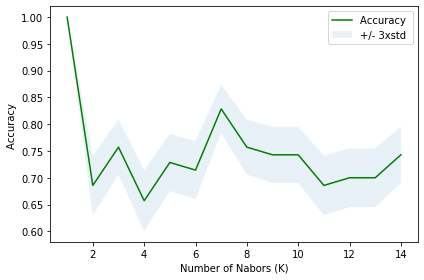

In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [13]:
k=7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [14]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train set Accuracy:  0.8285714285714286


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
houTree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
houTree # it shows the default parameters
houTree.fit(X_train,y_train)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_train, houTree.predict(X_train)))

DecisionTrees's Accuracy:  1.0


# Support Vector Machine

In [17]:
from sklearn import svm
housvm = svm.SVC(kernel='rbf')  # rbf, linear
housvm.fit(X_train,y_train) 
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_train, housvm.predict(X_train)))

DecisionTrees's Accuracy:  0.9857142857142858


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_train,LR.predict(X_train)))

DecisionTrees's Accuracy:  1.0


In [19]:
from sklearn.metrics import log_loss
yhat_prob=LR.predict_proba(X_train)
LR_logloss = log_loss(y_train, yhat_prob)
LR_logloss=format(LR_logloss, '.3F')
LR_logloss

'0.335'

# Model Evaluation

In [20]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [21]:
results = [
            {'Algorithm':'KNN', 'Jaccard':0,'F1-score':0,'LogLoss':0},
            {'Algorithm':'Decision Tree', 'Jaccard':0,'F1-score':0,'LogLoss':0},
            {'Algorithm':'SVM', 'Jaccard':0,'F1-score':0,'LogLoss':0},
            {'Algorithm':'LogisticRegression', 'Jaccard':0,'F1-score':0,'LogLoss':0}
         ] 
re_table = pd.DataFrame(results)
re_table


,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0,0,0
1,Decision Tree,0,0,0
2,SVM,0,0,0
3,LogisticRegression,0,0,0


In [22]:
# KNN

yhat= neigh.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, yhat))

KNN_f1=f1_score(y_test, yhat, average='weighted') 
KNN_f1=format(KNN_f1, '.3F')
re_table.iloc[0,1]=KNN_f1

KNN_jac = jaccard_similarity_score(y_test, yhat)
KNN_jac=format(KNN_jac, '.3F')
re_table.iloc[0,2]=KNN_jac

re_table.iloc[0,3]='NA'
#print(re_table)

Accuracy:  0.7222222222222222
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [23]:
# KNN test for whole data set

yhat= neigh.predict(X1)

print("Accuracy: ", metrics.accuracy_score(y, yhat))



Accuracy:  0.8068181818181818


In [24]:
# tree

yhat= houTree.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, yhat))

tree_f1=f1_score(y_test, yhat, average='weighted')
tree_f1=format(tree_f1, '.3F')
re_table.iloc[1,1]=tree_f1

tree_jac = jaccard_similarity_score(y_test, yhat)
tree_jac=format(tree_jac, '.3F')
re_table.iloc[1,2]=tree_jac

re_table.iloc[1,3]='NA'
# print(re_table)

Accuracy:  0.8333333333333334
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [25]:
# tree test for whole data set

yhat= houTree.predict(X1)
print("Accuracy: ", metrics.accuracy_score(y, yhat))


Accuracy:  0.9659090909090909


In [26]:
# SVM

yhat= housvm.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, yhat))
      
SVM_f1=f1_score(y_test, yhat, average='weighted')
SVM_f1=format(SVM_f1, '.3F')
re_table.iloc[2,1]=SVM_f1

SVM_jac = jaccard_similarity_score(y_test, yhat)
SVM_jac=format(SVM_jac, '.3F')
re_table.iloc[2,2]=SVM_jac

re_table.iloc[2,3]='NA'
#print(re_table)

Accuracy:  0.7222222222222222
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [27]:
# SVM test for whole data set

yhat= housvm.predict(X1)
print("Accuracy: ", metrics.accuracy_score(y, yhat))

Accuracy:  0.9318181818181818


In [28]:
# LogRe

yhat= LR.predict(X_test)
yhat_prob=LR.predict_proba(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, yhat))

LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat= LR2.predict(X_test)
yhat_prob=LR2.predict_proba(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, yhat))

LR_f1=f1_score(y_test, yhat, average='weighted')
LR_f1=format(LR_f1, '.3F')
re_table.iloc[3,1]=LR_f1


LR_jac = jaccard_similarity_score(y_test, yhat)
LR_jac=format(LR_jac, '.3F')
re_table.iloc[3,2]=LR_jac

LR_logloss = log_loss(y_test, yhat_prob)
LR_logloss=format(LR_logloss, '.3F')
re_table.iloc[3,3]=LR_logloss


Accuracy:  0.7222222222222222
Accuracy:  0.7222222222222222
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [29]:
# LogRe test for whole data set

yhat= LR.predict(X1)
print("Accuracy: ", metrics.accuracy_score(y, yhat))

Accuracy:  0.9431818181818182


### Accurancies for the Test dataset(out of sample):

In [30]:
re_table

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.736,0.722,NA
1,Decision Tree,0.842,0.833,NA
2,SVM,0.729,0.722,NA
3,LogisticRegression,0.735,0.722,0.629


## Decision Tree is choosed as it has better accurancies. 

## Plot results on the map.


In [31]:

import requests # library to handle requests

import matplotlib.cm as cm
import matplotlib.colors as colors

# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import folium # plotting library

In [32]:
address = 'Houston, TX'

geolocator = Nominatim(user_agent="hou_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of H-Town are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of H-Town are 29.7589382, -95.3676974.


When we did the analysis, the neiborhood cooridnates are removed. Now, we need to find the neiborhood name from df table. And then join with the original neiborhood table with coordinates. hou_snbname is the original talbe that  has both neighborhood names and coordinates. 

In [33]:
yhat= houTree.predict(X1)

In [34]:
df["ATM"]=yhat # copy to "ATM", then change name to "Whataburger_pre"-predicted value

In [35]:
wb_pre=df.rename(columns={"ATM":"Whataburger_pre"})

In [36]:
wb_pre.head()

,Neighborhood,Zoo Exhibit,Whataburger_pre,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Whataburger
0,ACRES HOME,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.071429,0.0,0.0,0.0,0.0,0.0
1,ADDICKS PARK TEN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,AFTON OAKS / RIVER OAKS AREA,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,ALIEF,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,ASTRODOME AREA,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.0,0.010000,0.0,0.0,0.0,0.0,1.0


In [37]:
wb1=wb_pre[['Neighborhood','Whataburger_pre','Whataburger']]

In [38]:
wb1['Whataburger']=wb1.Whataburger.astype(int)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
wb1.head()

,Neighborhood,Whataburger_pre,Whataburger
0,ACRES HOME,0,0
1,ADDICKS PARK TEN,0,0
2,AFTON OAKS / RIVER OAKS AREA,1,1
3,ALIEF,0,0
4,ASTRODOME AREA,1,1


Add coorindates to the results table.

In [40]:
hou_df=pd.read_csv("hou_snbname.csv")  #read the original coordinates table.

In [41]:
hou_df=hou_df.rename(columns={'SNBNAME':'Neighborhood'})

In [42]:
hou_df.head()

,Unnamed: 0,Neighborhood,Latitude,Longitude,POLYID
0,0,FOURTH WARD,29.759108,-95.380204,60
1,1,SECOND WARD,29.751715,-95.331634,63
2,2,DOWNTOWN,29.758336,-95.353891,61
3,3,CLINTON PARK TRI-COMMUNITY,29.739786,-95.255946,59
4,4,GREATER UPTOWN,29.771256,-95.490082,21


In [43]:
wb_merged = hou_df.join(wb1.set_index('Neighborhood'), on='Neighborhood')

In [44]:
wb_merged=wb_merged.drop(columns=["Unnamed: 0"],axis =1)

In [45]:
wb_before=wb_merged[wb_merged['Whataburger'] == 1].reset_index(drop=True)
wb_after=wb_merged[wb_merged['Whataburger_pre'] == 1].reset_index(drop=True)

In [46]:
wb_before.head()

,Neighborhood,Latitude,Longitude,POLYID,Whataburger_pre,Whataburger
0,PLEASANTVILLE AREA,29.775450,-95.278862,57,1,1
1,NEAR NORTHSIDE,29.790040,-95.355547,51,1,1
2,SPRING BRANCH EAST,29.795630,-95.496379,86,1,1
3,SPRING BRANCH NORTH,29.813478,-95.535702,84,1,1
4,SPRING BRANCH CENTRAL,29.797666,-95.508091,85,1,1


Mark whataburger locations-actual

In [47]:
wb_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(wb_before['Latitude'], wb_before['Longitude'], wb_before['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=1,
        parse_html=False).add_to(wb_map)  
    
wb_map

Mark whataburger locations-predicted

In [48]:
# add markers to map
for lat, lng, neighborhood in zip(wb_after['Latitude'], wb_after['Longitude'], wb_after['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.1,
        parse_html=False).add_to(wb_map) 
    
wb_map

The map shows a great agreement!